In [1]:
%matplotlib inline

# Import libraries
import numpy as np
from scipy.linalg import eigh
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Read input files
df_0a = pd.read_table('dihedral_1a.dat', delim_whitespace=True, names=['frame', 'a_psi', 'a_phi'])
df_0a = df_0a[df_0a['frame'] != '#Frame'].astype(float).drop('frame', axis=1)

df_0b = pd.read_table('dihedral_1b.dat', delim_whitespace=True, names=['frame', 'b_psi', 'b_phi'])
df_0b = df_0b[df_0b['frame'] != '#Frame'].astype(float).drop('frame', axis=1)

df_0c = pd.read_table('dihedral_1c.dat', delim_whitespace=True, names=['frame', 'c_psi', 'c_phi'])
df_0c = df_0c[df_0c['frame'] != '#Frame'].astype(float).drop('frame', axis=1)

df_0d = pd.read_table('dihedral_1d.dat', delim_whitespace=True, names=['frame', 'd_psi', 'd_phi'])
df_0d = df_0d[df_0d['frame'] != '#Frame'].astype(float).drop('frame', axis=1)

In [3]:
# Sine/cosine-transforming
psi_sin = []
psi_cos = []
phi_sin = []
phi_cos = []

for i, v in df_0a.iterrows():
    psi_sin.append(np.sin(float(v['a_psi']) * np.pi / 180))
    psi_cos.append(np.cos(float(v['a_psi']) * np.pi / 180))
    phi_sin.append(np.sin(float(v['a_phi']) * np.pi / 180))
    phi_cos.append(np.cos(float(v['a_phi']) * np.pi / 180))
    
df_sincos_0a = pd.DataFrame({'a_psi_sin':  psi_sin, 'a_psi_cos': psi_cos, 'a_phi_sin': phi_cos, 'a_phi_cos': phi_sin})

psi_sin = []
psi_cos = []
phi_sin = []
phi_cos = []

for i, v in df_0b.iterrows():
    psi_sin.append(np.sin(float(v['b_psi']) * np.pi / 180))
    psi_cos.append(np.cos(float(v['b_psi']) * np.pi / 180))
    phi_sin.append(np.sin(float(v['b_phi']) * np.pi / 180))
    phi_cos.append(np.cos(float(v['b_phi']) * np.pi / 180))
    
df_sincos_0b = pd.DataFrame({'b_psi_sin':  psi_sin, 'b_psi_cos': psi_cos, 'b_phi_sin': phi_cos, 'b_phi_cos': phi_sin})

psi_sin = []
psi_cos = []
phi_sin = []
phi_cos = []

for i, v in df_0c.iterrows():
    psi_sin.append(np.sin(float(v['c_psi']) * np.pi / 180))
    psi_cos.append(np.cos(float(v['c_psi']) * np.pi / 180))
    phi_sin.append(np.sin(float(v['c_phi']) * np.pi / 180))
    phi_cos.append(np.cos(float(v['c_phi']) * np.pi / 180))
    
df_sincos_0c = pd.DataFrame({'c_psi_sin':  psi_sin, 'c_psi_cos': psi_cos, 'c_phi_sin': phi_cos, 'c_phi_cos': phi_sin})

psi_sin = []
psi_cos = []
phi_sin = []
phi_cos = []

for i, v in df_0d.iterrows():
    psi_sin.append(np.sin(float(v['d_psi']) * np.pi / 180))
    psi_cos.append(np.cos(float(v['d_psi']) * np.pi / 180))
    phi_sin.append(np.sin(float(v['d_phi']) * np.pi / 180))
    phi_cos.append(np.cos(float(v['d_phi']) * np.pi / 180))
    
df_sincos_0d = pd.DataFrame({'d_psi_sin':  psi_sin, 'd_psi_cos': psi_cos, 'd_phi_sin': phi_cos, 'd_phi_cos': phi_sin})

df_total = pd.concat([df_sincos_0a, df_sincos_0b, df_sincos_0c, df_sincos_0d], axis=1)

In [4]:
df_total.head(10)

,a_phi_cos,a_phi_sin,a_psi_cos,a_psi_sin,b_phi_cos,b_phi_sin,b_psi_cos,b_psi_sin,c_phi_cos,c_phi_sin,c_psi_cos,c_psi_sin,d_phi_cos,d_phi_sin,d_psi_cos,d_psi_sin
0,-0.397920,0.917420,0.836509,0.547953,0.209764,0.977752,0.794858,0.606796,0.230452,0.973084,0.802477,0.596683,-0.090972,0.995853,0.393483,-0.919332
1,-0.081192,0.996698,0.853309,0.521406,0.367605,0.929982,0.919945,0.392048,-0.410321,0.911941,0.655065,0.755572,0.096044,0.995377,0.198420,-0.980117
2,-0.349192,0.937051,0.603212,0.797581,0.203743,0.979024,0.828190,0.560447,0.159562,0.987188,0.675791,0.737093,0.208134,0.978100,0.260348,-0.965515
3,-0.102676,0.994715,0.489264,0.872136,0.187433,0.982277,0.886688,0.462368,-0.460440,0.887691,0.810405,0.585870,0.124318,0.992242,0.121341,-0.992611
4,-0.083314,0.996523,0.680558,0.732694,0.099818,0.995006,0.699596,0.714539,-0.513763,0.857932,0.678434,0.734661,0.016562,0.999863,0.484852,-0.874596
5,0.033891,0.999426,0.863777,0.503875,0.379159,0.925332,0.920540,0.390649,-0.519488,0.854478,0.651602,0.758561,-0.225545,0.974233,0.542267,-0.840206
6,0.307792,0.951454,0.757995,0.652260,0.268316,0.963331,0.881538,0.472114,-0.290632,0.956835,0.627606,0.778531,0.051288,0.998684,0.465835,-0.884871
7,0.256332,0.966589,0.580049,0.814581,0.342458,0.939533,0.785812,0.618466,0.472403,0.881383,0.785461,0.618912,-0.291569,0.956550,0.357796,-0.933800
8,0.271017,0.962575,0.710343,0.703856,0.163734,0.986505,0.795020,0.606584,0.727724,0.685870,0.823569,0.567216,0.133524,0.991046,0.389798,-0.920901
9,0.286090,0.958203,0.859104,0.511801,-0.407722,0.913106,0.746391,0.665508,0.081079,0.996708,0.832633,0.553825,0.054933,0.998490,0.540810,-0.841145


In [5]:
# Implementation of Kernel PCA
def get_kernel(sigma):
    def kernel(x0, x1):
        #return np.exp(- sigma * (np.linalg.norm(x0 - x1) ** 2)) # Gaussian kernel
        #return (np.dot(x0,x1) + 1) ** sigma # Polynomial kernel
        return np.dot(x0,x1) # Linear kernel
    return kernel

In [6]:
def kpca(train_data, kernel):
    N = len(train_data)
    k0 = np.zeros(shape=(N,N))

    for n0, x0 in train_data.iterrows():
        for n1, x1 in train_data.iterrows():
            k0[n0,n1] = kernel(x0,x1)

    one_n = np.ones(shape=(N,N)) / N
    gram = k0 - one_n.dot(k0) - k0.dot(one_n) + one_n.dot(k0).dot(one_n)
    eigvals, eigvecs = eigh(gram)
    
    def calc(x, i):
        result = 0
        for n in range(N):
            result += eigvecs[n,-i] * kernel(x, train_data.iloc[n])
        return result / np.sqrt(eigvals[-i] * N)
    
    return calc

In [7]:
# Perform Kernel PCA
df_train = df_total.sample(1000).reset_index(drop=True)
calc = kpca(df_train, get_kernel(15))

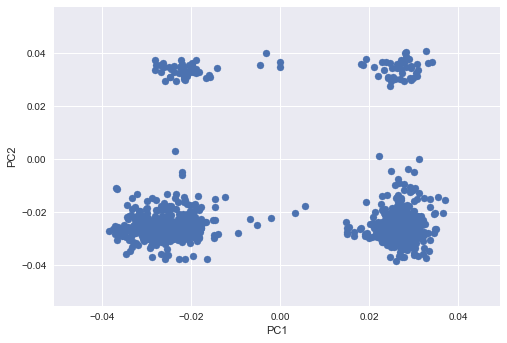

In [8]:
# Plot results
PC1 = [calc(v,1) for i, v in df_train.iterrows()]
PC2 = [calc(v,2) for i, v in df_train.iterrows()]
plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')